#### Mixed National Institute of Standards and Technology [MNIST](http://yann.lecun.com/exdb/mnist/)

In [2]:
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt
import random

#### MNIST IMPORT

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


#### Training and Other Variable Setting

In [6]:
image_size = 784
number_classes = 10
train_epochs = 5
batch_size = 100

#### X, Y , W , B Definition

In [7]:
X = tf.placeholder(tf.float32, [None,image_size])
Y = tf.placeholder(tf.float32, [None, number_classes])

W = tf.Variable(tf.random_normal([image_size, number_classes]))
b = tf.Variable(tf.random_normal([number_classes]))

#### Hypothesis, Cost(Loss), Optimizer(Optimize Option Selected)
- [Adam Optimizer](https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/training/adam.py)

In [8]:
Hypothesis = tf.nn.softmax(tf.matmul(X, W)+b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(Hypothesis), axis=1))
#일반적으로 Gradient Optimizer를 사용하면됨
#개인적으로 AdamOptimizer사용
optimize = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

In [18]:
correct = tf.equal(tf.arg_max(Hypothesis,1),tf.arg_max(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

#### Tensor Session Creation and Initialization
- Tessorflow 1.0 changed from initialize_all_variables to global_variables_initializer

In [19]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

#### Learning(Training) Start 

In [20]:
start_timer = time.time()
for epoch in range(train_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for step in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c , _ = sess.run([cost, optimize], feed_dict={X:batch_xs, Y: batch_ys})
        avg_cost += c / total_batch
    
    print('Epoch:', '%04d' % (epoch + 1), 'cost : ', '{:.9f}'.format(avg_cost))
print("Training(Learning) Finished")
estimated_time = time.time() - start_timer

Epoch: 0001 cost :  5.056123658
Epoch: 0002 cost :  1.799594957
Epoch: 0003 cost :  1.195476616
Epoch: 0004 cost :  0.937655089
Epoch: 0005 cost :  0.792239098
Training(Learning) Finished


In [21]:
print("Accuracy:(정확도):", accuracy.eval(session=sess,feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Accuracy:(정확도): 0.8476


In [22]:
r = random.randint(0, mnist.test.num_examples - 1)
print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r + 1],1)))
print("Prediction:", sess.run(tf.argmax(Hypothesis,1), feed_dict={X:mnist.test.images[r: r+1]}))

Label: [9]
Prediction: [9]


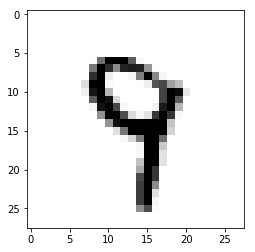

In [23]:
plt.figure()
plt.imshow(mnist.test.images[r : r + 1].reshape(28,28), cmap='Greys',interpolation='nearest')
plt.show()

In [24]:
'''
Epoch = 5의 경우 

1.  learning_rate=0.001
    optimize = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
    result : Accuracy:(정확도): 0.8476 (84.76%)

Epoch = 10인 경우 

1.  learning_rate=0.00001
    optimize = tf.train.AdamOptimizer(learning_rate=0.00001).minimize(cost)
    Accuracy:(정확도): 0.1295
    
2.  learning_rate=0.0001
    optimize = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)
    result : Accuracy:(정확도): 0.5871(58.71%)

3.  learning_rate=0.001
    optimize = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
    result : Accuracy:(정확도): 0.8839 (88.39%)
    
'''

'\nEpoch = 10인 경우 \n\n1. learning_rate=0.00001\n    optimize = tf.train.AdamOptimizer(learning_rate=0.00001).minimize(cost)\n    Accuracy:(정확도): 0.1295\n    \n2. learning_rate=0.0001\n    optimize = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)\n    result : Accuracy:(정확도): 0.5871(58.71%)\n\n3. learning_rate=0.001\n    optimize = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)\n    result : Accuracy:(정확도): 0.8839 (88.39%)\n    \n'

# Conclution
- AdamOptimize의 경우 LR = 1e-3 의 경우 최적의 결과를 보여주고 있다.
- 순환되는 훈련 카운트의 Epoch와 LR의 비율에 따라 정확도의 차이의 변화를 보여주고 있다. 개선하기 위해서는 적합한 수치를 대입하여 정확도를 높이는 연구가 진행되야겠다